# Step 1 : Business understanding
* Objectives :

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# Import dataset
data = pd.read_csv('train.csv')

# Step 2 : Exploratory Data Analysis (EDA)

In [3]:
# 1. Data Overview
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Step 3 : Data Preprocessing
* Handle missing values, outliers, and inconsistencies.
* Encode categorical variables and normalize numerical features.

In [5]:
# 1. Handling Missing Values
# There is huge missing values in this columns so im droping this columns and ID column is irrelevent
data.drop(['Id','Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [6]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

In [8]:
# There are missing values in LotFrontage so im filling with mean
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

In [9]:
# 2. Fill categorical columns with mode
data.fillna(data.mode().iloc[0], inplace=True)

In [10]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [11]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

### All missing values are filled 

In [13]:
# 3. Feature Engineering
# Create new features based on domain knowledge
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'] 
# data['YearSinceBuilt'] = data['YrSold'] - data['YearBuilt']
# data['YearSinceRemod'] = data['YrSold'] - data['YearRemodAdd']
data['TotalBath'] = data['FullBath'] + data["HalfBath"]

In [14]:
# As we add new columns from existing
data.drop(['TotalBsmtSF','1stFlrSF', '2ndFlrSF','FullBath','HalfBath'], axis=1, inplace=True)

In [15]:
# Convert categorical values to numeric by dummy variables
data = pd.get_dummies(data, drop_first=True).astype(int)

In [16]:
data.shape

(1460, 227)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 227 entries, MSSubClass to SaleCondition_Partial
dtypes: int32(227)
memory usage: 1.3 MB


In [18]:
data.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 227, dtype: int64

### All categorical values are converted, so no categorical values
### No missing values 
### Now dataset is ready for modelling

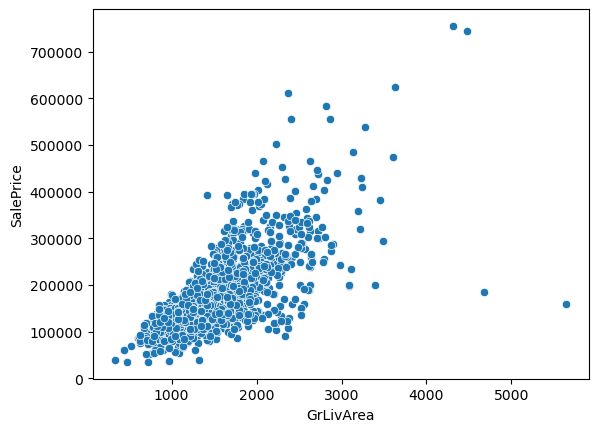

In [19]:
# Scatter plots of target variable against potential features
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

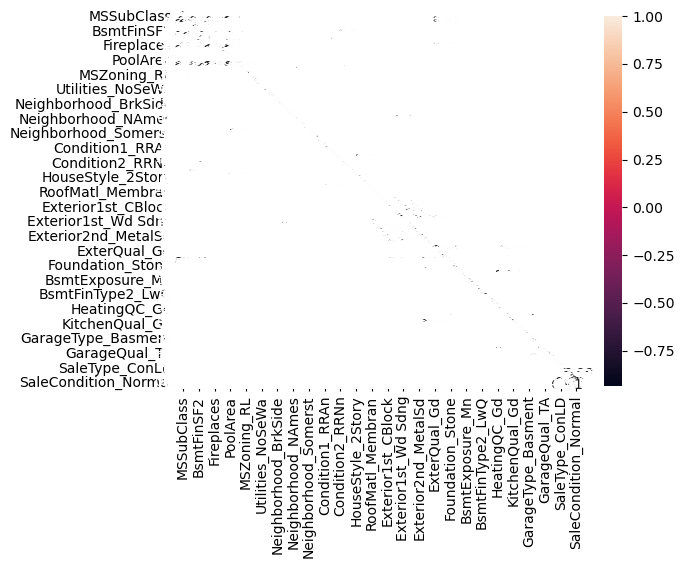

In [20]:
# Correlation Analysis
correlation = data.corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [21]:
# # Save the cleaned data to a new CSV file
# data.to_csv('clean_data.csv', index=False)

# Step 4 : Model Building

In [22]:
# 1. Dividing/split dataset into Independent and Dependent variables

X = data[['KitchenAbvGr','TotRmsAbvGrd','PoolArea','LotArea','GrLivArea', 'OverallQual', 'TotalBath','BedroomAbvGr','GarageArea','TotalSF', 'YearBuilt', 'YrSold']]
y = data['SalePrice']

KitchenAbvGr - kitchen rooms
TotRmsAbvGrd - ttoal rooms above ground
LotArea      -
GrLivArea    -

In [23]:
# 2. Training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape , X_test.shape

((1168, 12), (292, 12))

In [25]:
# 4. Model Selection
# A. Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [26]:
# B. Random Forest Regression
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Model Evaluation
# 1. Predict on Test Data
y_pred_lr = model_lr.predict(X_test)
y_pred_lr

array([141713.95508757, 310643.2134519 , 116707.67972497, 171911.47370814,
       291682.66910035,  66379.98988342, 211785.1017079 , 170653.37941299,
        64385.41400378, 148665.60190601, 160192.4187423 , 108855.85973801,
       120576.32313693, 225671.5004951 , 193937.15939555, 124968.73438033,
       213440.16445049, 132873.53043281, 134632.61610514, 221306.00845923,
       179272.77791346, 231659.0329293 , 186763.6267896 , 111451.21264934,
       215494.58473981, 175842.18534078, 200112.60534793,  97664.64741568,
       191348.98829018, 204413.09372546, 106483.54521626, 257402.30215786,
       241669.22358436,  92934.29226523, 272790.08804423, 147412.60448137,
       164440.50616007, 218835.08082075, 292146.00740814,  94011.65303578,
       134120.88206624, 239114.87286379, 113751.53371853, 321644.96935625,
       124838.12104946, 153617.45891315, 117294.51670187, 121608.37172805,
       355584.5789383 , 147815.20775283, 110843.25828341, 203575.9487679 ,
       109939.74218638, 3

In [28]:
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([136041.25      , 348519.96      , 110870.31      , 153846.84      ,
       304643.13      ,  75208.        , 205076.25      , 151027.24      ,
        76180.5       , 138713.25      , 150790.47      , 123689.99      ,
       120185.        , 218391.6       , 182490.2       , 122247.75      ,
       193111.4       , 126132.5       , 115829.08      , 208471.1       ,
       166283.5       , 214183.46      , 176724.92      , 113218.        ,
       191506.3       , 179061.7       , 180050.22      , 116382.49      ,
       182468.28      , 200782.54      , 119911.04      , 239741.69      ,
       205814.5       , 113758.5       , 263292.73      , 144737.        ,
       160525.        , 207888.38      , 318186.11      , 106321.        ,
       117034.5       , 237985.8       , 118951.5       , 391786.67      ,
       140931.1       , 172658.        , 119549.83      , 120861.83      ,
       398462.37      , 144131.55      , 120661.5       , 183608.36      ,
       112583.79333333, 3

In [29]:
# 2. Calculate Metrics
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression - RMSE:", rmse_lr)
print("Linear Regression - R-squared:", r2_lr)
print()
print()
print("Random Forest Regression - RMSE:", rmse_rf)
print("Random Forest Regression - R-squared:", r2_rf)

Linear Regression - RMSE: 38230.91667368115
Linear Regression - R-squared: 0.8094470886596161


Random Forest Regression - RMSE: 32190.561265485576
Random Forest Regression - R-squared: 0.8649037594234223


C:\Users\SAMEER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\SAMEER\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
# Example: Predict house price for a new data point
new_data_point = pd.DataFrame([[2,8,800,8450, 3010, 7,4,9,800,3500,2009,2009]], columns=['KitchenAbvGr','TotRmsAbvGrd','PoolArea','LotArea','GrLivArea', 'OverallQual', 'TotalBath','BedroomAbvGr','GarageArea','TotalSF', 'YearBuilt', 'YrSold'])
predicted_price = model_rf.predict(new_data_point)
print(f"Predicted Price for the new data point: ${predicted_price[0]}")

Predicted Price for the new data point: $266661.29


In [31]:
# Create a DataFrame from new user input
input_data = pd.DataFrame({
    'KitchenAbvGr': [2],
    'TotRmsAbvGrd': [8],
    'PoolArea': [500],
    'LotArea': [9000],
    'GrLivArea': [7000],
    'OverallQual': [7],    
    'TotalBath': [5],
    'BedroomAbvGr': [8],
    'GarageArea': [600],
    'TotalSF': [4000], 
    'YearBuilt' : [2009],
    'YrSold' : [2003],
    # Add any other required features with default values if not provided
})

predicted_price = model_rf.predict(new_data_point)
print(f"Predicted Price for the new data point: ${predicted_price[0]}")


Predicted Price for the new data point: $266661.29


In [32]:
import joblib

# Save the trained RandomForest model
joblib.dump(model_rf, 'model_rf.pkl')

# Save the scaler
#joblib.dump(scaler, 'scaler.pkl')

['model_rf.pkl']

In [33]:
import joblib

# Load the saved RandomForest model and scaler
loaded_model = joblib.load('model_rf.pkl')
#loaded_scaler = joblib.load('scaler.pkl')